In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_2015 = pd.read_csv('./data_pd/marathon_results_2015.csv')
df_2016 = pd.read_csv('./data_pd/marathon_results_2016.csv')
df_2017 = pd.read_csv('./data_pd/marathon_results_2017.csv')

In [ ]:
df = pd.concat([df_2015,df_2016,df_2017], ignore_index=True)
df.head(5)

,Unnamed: 0,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,...,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division,Unnamed: 8
0,0.0,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,NaN,...,1:32:00,1:47:59,2:02:39,0:04:56,-,2:09:17,1,1,1,NaN
1,1.0,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,NaN,...,1:31:59,1:47:59,2:02:42,0:04:58,-,2:09:48,2,2,2,NaN
2,2.0,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,NaN,NaN,...,1:32:00,1:47:59,2:03:01,0:04:59,-,2:10:22,3,3,3,NaN
3,3.0,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,NaN,NaN,...,1:32:00,1:48:03,2:03:47,0:05:00,-,2:10:47,4,4,4,NaN
4,4.0,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,NaN,NaN,...,1:32:00,1:47:59,2:03:27,0:05:00,-,2:10:49,5,5,5,NaN


In [4]:
# df['Official Time'] = pd.to_datetime(df['Official Time'], errors='coerce')
# df.info()
df[['Hours','Minutes','Seconds']]  = df['Official Time'].str.split(':', expand=True)
df[['Hours_pace','Minutes_pace','Seconds_pace']]  = df['Pace'].str.split(':', expand=True)


In [ ]:
df['Pace_duration'] = df['Hours_pace'].astype(int)*3600 + df['Minutes_pace'].astype(int)*60 + df['Seconds_pace'].astype(int)
df['Overall_duration'] = df['Hours'].astype(int)*3600 + df['Minutes'].astype(int)*60 + df['Seconds'].astype(int)

In [ ]:
df = df.drop(['Hours','Minutes','Seconds','Hours_pace','Minutes_pace','Seconds_pace'], axis=1)

In [7]:
df.head()

,Unnamed: 0,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,...,40K,Pace,Proj Time,Official Time,Overall,Gender,Division,Unnamed: 8,Pace_duration,Overall_duration
0,0.0,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,NaN,...,2:02:39,0:04:56,-,2:09:17,1,1,1,NaN,296,7757
1,1.0,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,NaN,...,2:02:42,0:04:58,-,2:09:48,2,2,2,NaN,298,7788
2,2.0,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,NaN,NaN,...,2:03:01,0:04:59,-,2:10:22,3,3,3,NaN,299,7822
3,3.0,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,NaN,NaN,...,2:03:47,0:05:00,-,2:10:47,4,4,4,NaN,300,7847
4,4.0,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,NaN,NaN,...,2:03:27,0:05:00,-,2:10:49,5,5,5,NaN,300,7849


In [8]:
# def conver_time(df, columns):
#     for col in columns:
#         print("Processing: ", col)
#         df[[f'{col}_Hours',f'{col}_Minutes',f'{col}_Seconds']]  = df[col].str.split(':', expand=True)
#         df[f'{col}_duration'] = df[f'{col}_Hours'].astype(int)*3600 + df[f'{col}_Minutes'].astype(int)*60 + df[f'{col}_Seconds'].astype(int)
#         df = df.drop([f'{col}_Hours',f'{col}_Minutes',f'{col}_Seconds'], axis=1)
#     return df

In [9]:
# df_c[df_c['5K'].str.contains('-') == True]

In [10]:
corr_overall = df[['Pace_duration', 'Overall_duration']].corr()

In [11]:
print("overall correlation between Pace_duration and Overall_duration : \n", corr_overall)

overall correlation between Pace_duration and Overall_duration : 
                   Pace_duration  Overall_duration
Pace_duration          1.000000          0.999667
Overall_duration       0.999667          1.000000


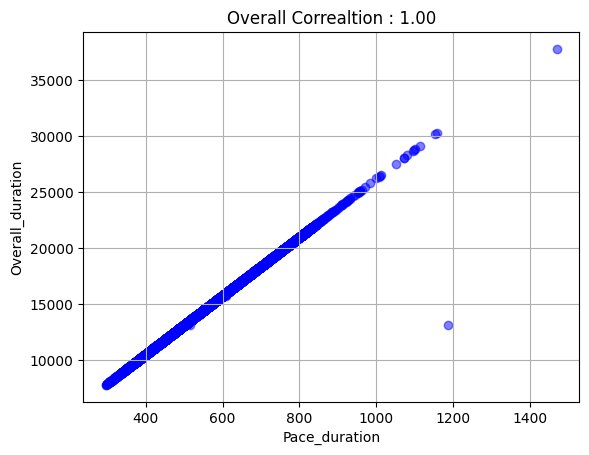

In [12]:
# Create Scatter plot with correlation values
plt.scatter(df['Pace_duration'],df['Overall_duration'], color='blue', alpha=0.5)
plt.title(f'Overall Correaltion : {corr_overall.loc["Pace_duration","Overall_duration"]:.2f}')
plt.xlabel('Pace_duration')
plt.ylabel('Overall_duration')
plt.grid(True)